# AICE Associate 연습문제

## 와인 품질 예측 (Wine Quality Prediction)

와인 데이터를 읽어들여 데이터를 분석 및 전처리한 후 머신러닝과 딥러닝으로 와인의 품질을 예측하고 결과를 분석하세요.

---

fixed acidity: 고정산도<br>
volatile acidity: 휘발성산도 <br>
citric acid: 구연산 <br>
residual sugar: 잔류당<br>
chlorides: 염화물<br>
free sulfur dioxide: 유리 이산화황<br>
total sulfur dioxide: 총 이산화황<br>
density: 밀도<br>
pH: pH<br>
sulphates: 황산염<br>
alcohol: 알코올<br>
quality: 품질<br>

### 1. seaborn 라이브러리를 별칭 sns로 임포트하는 코드를 작성하고 실행하시오. 
---
- 설치되어 있지 않으면 설치해서 임포트하세요.
---

In [ ]:
# 여기에 답안코드를 작성하세요.
import seaborn as sns

<br>

다음 문항을 풀기 전에 아래의 코드를 실행하세요.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc("font", family="NanumGothicCoding")

<br>

### 2. 모델링을 위해 분석 및 처리할 데이터 파일을 읽어오려고 합니다. pandas 함수로 데이터 파일을 읽고 데이터프레임 변수명 df에 할당하는 코드를 작성하세요.
---
- winequality-red-nan.csv 파일을 읽어 df_a에 할당하세요.
- winequality-white-nan.csv 파일을 읽어 df_b에 할당하세요.
- df_a와 df_b 데이터프레임을 판다스의 concat 함수를 활용하여 합쳐 데이터프레임 변수명 df에 저장하세요.
    - 두 데이터프레임에 각각 'type' 컬럼을 추가하여 df_a는 'red'로, df_b는 'white'로 채우세요.
- 병합된 데이터프레임 df에서 'Unnamed: 0' 컬럼을 제거하세요.
---

In [ ]:
# 여기에 답안코드를 작성하세요.
df_a = pd.read_csv("winequality-red-nan.csv")
df_b = pd.read_csv("winequality-white-nan.csv")

print(df_a.info())
print(df_b.info())

df_a["type"] = "red"
df_b["type"] = "white"

df = pd.concat([df_a, df_b])
df = df.drop("Unnamed: 0", axis=1)

print(df.info())

<br>

### 3. 합쳐진 데이터프레임을 간단하게 기초통계를 통해 살펴보려고 합니다.
---
- 출력된 데이터프레임의 정보와 일치하지 않는 내용을 '답안03'변수에 저장하세요. (예: 답안03=1)
    1. 데이터의 총 길이는 6497 이다.
    2. 모든 컬럼이 수치형 변수이다.
    3. 총 이산화황의 제3사분위수는 155 이다.
    4. 결측값이 가장 많은 컬럼은 알코올 이다.
---

In [ ]:
# 여기에 답안코드를 작성하세요.
print(df.info())
display(df.describe(include='all'))

답안03 = 2

<br>

### 4. 와인타입과 품질에 대해 황산염의 분포를 확인하려고 합니다.
---
'quality' 대해 boxplot그래프로 만드는 코드와 답안을 작성하세요.
- Seaborn을 활용하세요.
- 데이터프레임의 인덱스를 초기화하고 기존 인덱스는 제외해주세요.
- 출력된 그래프와 다른 해석을 하는 선택지를 "답안04" 변수에 저장하세요. (예: 답안04=1)
    1. 화이트와인보다 레드와인에 황산염이 더 많이 포함되어 있다.
    2. 레드와인의 중앙값은 화이트와인의 중앙값보다 높다.
    3. 레드와인만이 품질 9의 데이터가 존재한다.
---

In [ ]:
# 여기에 답안코드를 작성하세요.
import seaborn as sns

df.reset_index(inplace=True, drop=True)

sns.boxplot(data=df, x='quality', y= 'sulphates', hue='type')
plt.show()


답안04 = 3

<br>

### 5. 품질에 따른 알코올의 분포를 확인해보려고합니다.
---
다음 가이드를 따라 그래프를 시각화하세요.
- Seaborn의 histplot을 활용하세요.
- 와인의 품질이 6 이상인 데이터만 활용하세요.
- 막대가 겹치지 않도록 옵션 값으로 'stack'을 사용하세요.
- 히스토그램의 막대 개수가 8개가 되도록 설정하세요.
---

In [ ]:
# 여기에 답안코드를 작성하세요.
df_6 = df[df['quality'] >= 6]

sns.histplot(data=df_6, x='alcohol', hue='quality', multiple="stack", bins=8)
plt.show()

<br>

### 6. 수치형 변수들의 상관관계를 확인하세요.
---
다음 가이드를 따라 그래프를 시각화하세요.
- 대상 데이터프레임: df
- seaborn을 사용하세요
    - 그래프 안에 상관관계 수치를 표시하세요.
- 타겟변수와 가장 상관관계가 높은 컬럼을 "답안06"변수에 작성하세요. (예: 답안06='quality')
---

In [ ]:
# 여기에 답안코드를 작성하세요.
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

답안06 = 'alcohol'

<br>

### 7. 피벗 테이블을 사용하여 총 이산화황(total sulfur dioxide)의 와인 타입과 품질에 대한 분석을 하려고 합니다.
---
다음 가이드를 따라 피벗 테이블을 작성하세요.
- pandas의 pivot_table을 활용하세요.
- 피벗 테이블의 컬럼은 와인 타입('type')으로, 인덱스는 품질('quality')로 지정하세요.
- 총 이산화황은 평균과 최대값을 출력하세요.
- 출력된 테이블에서 가장 큰 이상치가 존재할 것 같은 품질과 타입을 "답안07" 변수에 저장하세요. (예: 답안07=[9, 'red'])
---

In [ ]:
# 여기에 답안코드를 작성하세요.
pivot = pd.pivot_table(df, values='total sulfur dioxide', index='quality', columns='type', aggfunc=['mean', 'max'])
print(pivot)

답안07 = [3, "white"]

<br>

### 8. 이상치는 잘못된 결과를 만들 가능성이 높습니다.
---
 아래 가이드를 따라 결측치를 처리 하세요.
- 대상 데이터프레임: df
- 대상 컬럼: 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide'
    - 상단경계보다 큰 이상치를 확인하고, 각 이상치를 상단경계 값으로 변경하세요.
    - 전처리 반영된 결과를 새로운 데이터프레임 변수명  'df_out' 에 저장하세요.
---

In [ ]:
# 여기에 답안코드를 작성하세요.
df_out = df.copy()

col_list = ["residual sugar", "free sulfur dioxide", "total sulfur dioxide"]

for col in col_list:
    Q1 = df_out[col].quantile(0.25)
    Q3 = df_out[col].quantile(0.75)
    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    outliers = df_out[df_out[col] > upper_bound]
    
    df_out.loc[outliers.index, col] = upper_bound

print(df_out[col_list].describe())

<br>

### 9. 모델링 성능을 제대로 얻기 위해서 결측치 처리는 필수입니다.
---
 아래 가이드를 따라 결측치를 처리 하세요.
- 대상 데이터프레임: df_out
    - 결측치를 확인하는 코드를 작성하세요.
    - 결측치를 중앙값으로 대체하세요.
    - 전처리 반영된 결과를 새로운 데이터프레임 변수명  df_na 에 저장하세요.
---

In [ ]:
# 여기에 답안코드를 작성하세요.
df_na = df_out.copy()

print(df_na.info())

df_na = df_na.fillna(df_na.median(numeric_only=True))

print(df_na.info())

<br>

### 10. 원-핫 인코딩(One-hot encoding)은 범주형 변수를 수치형 변수로 변환하기 위하여 사용하는 방법입니다.
---
아래 조건에 해당하는 컬럼 데이터에 원-핫 인코딩을 적용하세요.
- 대상 데이터프레임: df_na
- 원-핫 인코딩 대상: object 타입의 컬럼
- 활용 함수: Pandas의 get_dummies
- 원-핫 인코딩의 경우 첫 번째 범주를 제거하고 float 타입으로 저장하세요.
- 해당 전처리가 반영된 결과를 데이터프레임 변수 df_enc 에 저장해 주세요.
---

In [ ]:
# 여기에 답안코드를 작성하세요.
df_enc = df_na.copy()

df_enc = pd.get_dummies(df_enc, columns=["type"], drop_first=True, dtype=float)

print(df_enc.info())

<br>

### 11. 훈련과 검증 각각에 사용할 데이터셋을 분리하려고 합니다.
---
"quality" 컬럼을 y로, 나머지 컬럼을 X로 할당한 후, 훈련데이터셋과 검증데이터셋으로 분리하세요.

 - 대상 데이터프레임: df_enc
 - 훈련과 검증 데이터셋 분리
     - 훈련 데이터셋 label: y_train, 훈련 데이터셋 Feature: X_train
     - 검증 데이터셋 label: y_valid, 검증 데이터셋 Feature: X_valid 
     - 훈련 데이터셋과 검증데이터셋의 비율은 80:20
     - random_state: 42
     - Scikit-learn의 train_test_split 함수를 활용하세요
---

In [ ]:
# 여기에 답안코드를 작성하세요.
from sklearn.model_selection import train_test_split

y = df_enc[["quality"]]
X = df_enc.drop("quality", axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

<br>

### 12. 현재의 데이터셋은 머신러닝에 바로 사용할 수 없는 형태입니다.
---
다음 가이드를 따라서 훈련데이터셋과 검증데이터셋에 스케일링을 수행하세요.
- MinMaxScaler 스케일링 수행
    - sklearn.preprocessing의 MinMaxScaler 함수 사용
---

In [ ]:
# 여기에 답안코드를 작성하세요.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

<br>

### 13. quality를 예측하는 머신러닝 모델을 만들려고 합니다.
---
다음 가이드에 따라 sklearn.ensemble의 GradientBoostingRegressor모델을 gbr 변수에 저장해 주세요.
- 트리의 깊이: 5
- 트리의 수: 50
- learning_rate: 0.05
- random_state: 42
- 위의 모델을 학습해 주세요. 학습 시 훈련데이터 셋을 활용해 주세요.
---

In [ ]:
# 여기에 답안코드를 작성하세요.
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(max_depth=5, n_estimators=50, learning_rate=0.05, random_state=42)

gbr.fit(X_train, y_train)

<br>

### 14. 두개의 머신러닝 모델을 추가하려합니다.
---
다음 가이드에 따라 모델을 구현하세요.
- xgboost의 XGBRFRegressor 모델을 xgbr 변수에 저장하세요
    - 트리의 깊이: 5
    - 트리의 수: 50
    - learning_rate: 0.05
    - random_state: 42
- sklearn.ensemble의 RandomForestRegressor 모델을 rfr 변수에 저장하세요
    - 트리의 깊이: 5
    - 트리의 수: 50
    - random_state: 42
    - 위의 2개의 모델을 학습해 주세요. 학습 시 훈련데이터 셋을 활용해 주세요.
---

In [ ]:
# 여기에 답안코드를 작성하세요.
from xgboost import XGBRFRegressor
from sklearn.ensemble import RandomForestRegressor

xgbr = XGBRFRegressor(max_depth=5, n_estimators=50, learning_rate=0.05, random_state=42)
rfr = RandomForestRegressor(max_depth=5, n_estimators=50, random_state=42)

xgbr.fit(X_train, y_train)
rfr.fit(X_train, y_train)

<br>

### 15. 13번과 14번에서 학습한 모델의 성능을 평가하려고 합니다.
---
아래 가이드에 따라 예측 결과의 mean_absolute_error를 구하고 평가하세요.
- 성능 평가는 검증 데이터셋을 활용하세요.
- 각 모델에 대해 검증데이터셋을 사용하여 y값을 예측(predict)하고 모델이름_pred 변수에 저장하세요.
- 3개의 모델에 대한 mae 성능평가 결과를 확인하여 가장 성능이 좋은 모델의 이름을 '답안15' 변수에 저장하세요.
- 예) 답안15='XGBRFRegressor' 혹은 답안15='RandomForestRegressor' 등
---

In [ ]:
# 여기에 답안코드를 작성하세요.
from sklearn.metrics import mean_absolute_error

gbr_pred = gbr.predict(X_valid)
xgbr_pred = xgbr.predict(X_valid)
rfr_pred = rfr.predict(X_valid)

gbr_mae = mean_absolute_error(y_valid, gbr_pred)
xgbr_mae = mean_absolute_error(y_valid, xgbr_pred)
rfr_mae = mean_absolute_error(y_valid, rfr_pred)

print(gbr_mae)
print(xgbr_mae)
print(rfr_mae)

답안15 = "GradientBoostingRegressor"

<br>

### 16. 15번에서 가장 성능이 좋았던 모델을 가지고 GridSearchCV를 수행하여 최적의 파라미터를 찾아보려고합니다.
---
아래 가이드에 따라 GridSearchCV를 수행하세요
- cv = 5
- 파라미터
    - n_estimators : [30, 50, 100],
    - max_depth : [5, 7, 10],
    - learning_rate : [0.01, 0.05],
- 서치 시, scoring을 'neg_mean_squared_error', cv를 5, n_jobs를 -1로 설정하세요.
- 최적의 파라미터를 갖는 모델을 선택하여 검증을 수행하고 최종 성능을 출력하세요.
---

In [ ]:
# 여기에 답안코드를 작성하세요.
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [30, 50, 100],
    'max_depth': [5, 7, 10],
    'learning_rate': [0.01, 0.05],
}

grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error',
                           n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_valid)
best_mae = mean_absolute_error(y_valid, y_pred)
print(best_mae)

<br>

다음 문항을 풀기 전에 아래의 코드를 실행하세요.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

import os
import random
import numpy as np


random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)

<br>

### 17. 와인 품질을 예측하는 딥러닝 모델을 만들려고 합니다.
---
아래 가이드에 따라 모델링하고 학습을 진행하세요.
- Tensorflow framework를 사용하여 딥러닝 모델을 만드세요.
- 아래의 설계된 모델을 구현하세요.
- 손실함수는 'mse'를 사용하세요.
- 각 에포크마다 'mse'로 모델을 평가하며, 최적화 기법은 'adam'을 사용하세요.
- 하이퍼파라미터 epochs : 20, batch_size : 64 으로 설정해 주세요.
- 각 에포크마다 loss와 metrics 평가하기 위한 데이터로 X_valid, y_valid 사용하세요.
- EarlyStopping을 사용하여 val_loss를 보고 10회의 대기 후 성능이 향상되지 않으면 종료하며, 가장 낮은 검증 손실을 낸 모델 파라미터로 복구하세요.
- ModelCheckpoint를 활용하여 동일 폴더에 'best_model.h5'라는 이름의 가장 좋은 성능의 모델만 저장하세요.
- 학습정보는 history 변수에 저장해 주세요.
---

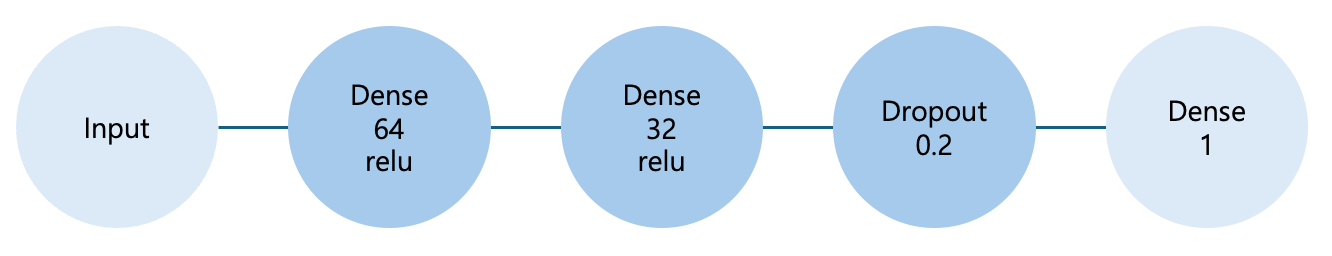

In [ ]:
# 여기에 답안코드를 작성하세요.
model = Sequential([
    Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(units=32, activation='relu'),
    Dropout(0.2),
    Dense(1)])

model.summary()

model.compile(optimizer='adam', 
              loss='mse', 
              metrics=['mse']) 

es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
cp = ModelCheckpoint("./best_model.h5", monitor='val_loss', save_best_only=True)

history = model.fit(X_train, y_train, epochs=20, batch_size=64,
          verbose=1, validation_data=(X_valid, y_valid), callbacks=[es, cp])


<br>

### 18. 17번 딥러닝 모델의 성능을 평가하려고 합니다.
---
Matplotlib 라이브러리를 활용해서 학습 mse와 검증 mse를 그래프로 표시하세요.
- 1개의 그래프에 학습 mse과 검증 mse 2가지를 모두 표시하세요.
- 위 2가지 각각의 범례를 'Train', 'Validation'로 표시하세요.
- 그래프의 타이틀은 'Model MSE'로 표시하세요.
- X축에는 'Epochs'라고 표시하고 Y축에는 'MSE'라고 표시하세요.
---

In [ ]:
# 여기에 답안코드를 작성하세요.
plt.plot(history.history['mse'], label='Train')
plt.plot(history.history['val_mse'], label='Validation')
plt.title('Model MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

<br>

### 19. 17번에서 저장한 딥러닝 모델을 불러와서 주어진 데이터로 시뮬레이션을 하려합니다.
---
다음 가이드를 따라 시뮬레이션을 진행하세요.
- tensorflow.keras.models의 load_model을 사용하여 최적의 모델을 불러옵니다.
- 주어진 시뮬레이션 데이터에 대해 예측 결과를 구하고 반올림하여 정수로 출력하세요.
---

In [ ]:
sim1 = np.array([[0.30508, 0.16, 0.34146, 1.0, 0.09468, 0.88421, 0.7026, 0.24851, 0.87323, 0.3236, 0.17742, 1.0]])
sim2 = np.array([[0.12034, 0.472, 0.06504, 0.0885, 0.0598, 0.23684, 0.15613, 0.15018, 0.59055, 0.15169, 0.14839, 0.0]])
sim3 = np.array([[0.2379, 0.192, 0.21951, 0.60767, 0.05648, 0.47368, 0.52045, 0.17717, 0.3937, 0.14045, 0.32258, 1.0]])

In [ ]:
# 여기에 답안코드를 작성하세요.
from tensorflow.keras.models import load_model

model = load_model('./best_model.h5')

res_1 = model.predict(sim1)
res_2 = model.predict(sim2)
res_3 = model.predict(sim3)

print(np.round(res_1))
print(np.round(res_2))
print(np.round(res_3))

모든 문제를 다 푸셨습니다. 고생하셨습니다.